# Proyecto Análisis de Negocios


Para este trabajo, haremos prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. 
Nuestra tarea en esta ocasión es ayudar a optimizar los gastos de marketing. 


**Cuentas con:**

-Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018

-Archivo con los pedidos en este periodo

-Estadísticas de gastos de marketing.



# Objetivos generales de esta investigación

Para este trabajo tendremos diferentes objetivos dependiendo el departamento que estemos analizando, en esta ocasión nos interesa conocer:

-Cómo es que los clientes usan el servicio que les ofrecemos.

-Cuándo empiezan a comprar

-Cuánto dinero aporta cada cliente a la compañía

-Cuándo los ingresos cubren el costo de adquisición de los clientes.

Con esto en mente podremos tener una idea de donde comenzar y que datos buscar, lo cual nos ayudara a tener mejor enfoque en cuanto a los resultados buscados.

# Descripción de los data

**La tabla visits (registros del servidor con datos sobre las visitas al sitio web):**

-Uid: identificador único del usuario.

-Device: dispositivo del usuario.

-Start Ts: fecha y hora de inicio de la sesión.

-End Ts: fecha y hora de término de la sesión.

-Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.



**La tabla orders (datos sobre pedidos):**

-Uid: identificador único del usuario que realiza un pedido.

-Buy Ts: fecha y hora del pedido. 

-Revenue: el ingreso de Showz por el pedido.



**La tabla costs (datos sobre gastos de marketing):**

-source_id: identificador de la fuente de anuncios.

-dt: fecha.

-costs: gastos en esta fuente de anuncios en este día.

# Preparación y limpieza de los datas

En esta sección accederemos a los datas y haremos un análisis sobre las condiciones en el que nos fueron entragdos los 3 datas a utilizar, buscando dejar en las mejores condiciones para su uso posterior en el análisis.

Se buscará eliminar duplicados, valores ausentes, verificar el tipo de dato correcto para cada columna, logrando así asegurar el mejor análisis basado en los objetivos señalados por la empresa.

In [1]:
#cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#cargar los archivos
visits= pd.read_csv("/datasets/visits_log_us.csv")
orders= pd.read_csv("/datasets/orders_log_us.csv")
costs= pd.read_csv("/datasets/costs_us.csv")

In [3]:
#inicia el análisis de la tabla visits
#manda a llamar info para conocer el tipo de datos que tenemos y analizar si debemos cambiar el tipo de datos
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
#visualiza las primeras filas del data visits
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [6]:
#mejorar el nombre de las columnas, colocar en minúscula y guión bajo
new_columns_name= [] #se crea una nueva lita donde guardar el resultado deseado

for old_name in visits.columns: #bucle para cambios en el nombre de las columnas
    name_lowered= old_name.lower() #pasa a minúsculas
    name_no_spaces = name_lowered.replace(" ","_") #reemplazan los espacios vacios con guión bajo
    new_columns_name.append(name_no_spaces)

In [7]:
visits.columns=new_columns_name #reemplazan los nombres pasados a los nombres con cambios

In [8]:
#cambiar el tipo de dato a datetime de la columna end_ts
visits["end_ts"]=pd.to_datetime(visits["end_ts"] , format="%Y-%m-%d")

In [9]:
#cambiar el tipo de dato a datetime de la columna start_ts
visits["start_ts"]=pd.to_datetime(visits["start_ts"] , format="%Y-%m-%d")

In [10]:
#buscar valores ausentes
print(visits.isna().sum())

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


In [11]:
#buscar filas duplicadas
print(visits.duplicated().sum())

0


In [12]:
#verificar cambios en el tipo de dato del data
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [13]:
#inicia el análisis de la tabla orders
#manda a llamar info para conocer su tipo de datos
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [14]:
#visualizan las primeras fila del data
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [15]:
orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [16]:
#mejorar el nombre de las columnas, colocar en minúscula y guión bajo
new_col_name= [] #se crea una nueva lita donde guardar el resultado deseado

for old_name in orders.columns: #bucle para cambios en el nombre de las columnas
    name_lowered= old_name.lower() #pasa a minúsculas
    name_no_spaces = name_lowered.replace(" ","_") #reemplazan los espacios vacios con guión bajo
    new_col_name.append(name_no_spaces)

In [17]:
orders.columns=new_col_name #reemplazan los nombres pasados a los nombres con cambios

In [18]:
#cambiar el tipo de dato a datetime de la columna buy_ts
orders["buy_ts"]=pd.to_datetime(orders["buy_ts"] , format="%Y-%m-%d")

In [19]:
#buscar valores ausentes
print(orders.isna().sum())

buy_ts     0
revenue    0
uid        0
dtype: int64


In [20]:
#buscar filas duplicadas
print(orders.duplicated().sum())

0


In [21]:
#verificar cambios en el tipo de dato del data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [22]:
#inicia el análisis de la tabla costs
#manda a llamar info para conocer su tipo de datos
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [23]:
#visualizan las primeras fila del data
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [24]:
#cambiar el tipo de dato a datetime de la columna dt
costs["dt"]=pd.to_datetime(costs["dt"] , format="%Y-%m-%d")

In [25]:
#buscar valores ausentes
print(costs.isna().sum())

source_id    0
dt           0
costs        0
dtype: int64


In [26]:
#buscar filas duplicadas
print(costs.duplicated().sum())

0


In [27]:
#verificar cambios en el tipo de dato del data
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Los 3 datas en general no tenían valores ausentes u valores duplicados, las únicas modificaciones que se hicieron en el data visits y orders, cambiando el tipo de datos a date time y mejorando los títulos de ambas datas para una meojr presentación.

# Análisis, informes y métricas

En esta sección dividiremos el análisis en 3 secciones sobre la busqueda de la información solicitada: visitas, ventas y marketing.
En cada sección el enfoque del análisis de los usuarios será diferente, por lo cual se especificará el objetivo de cada análisis al incio de cada sección.
Todo esto con el objetivo de cumplir con los objetivos solicitados por la empresa para mejorar su rendimeinto y métricas, además...

# Visitas 

Para este data buscaremos analizar la actividad de los usuarios en nuestra página, conociendo el tráfico de usuario en diferentes periodos de tiempo, la duración promedio  cual es la frecuencia de regreso.
Con esto podemos entender de mejor manera a nuestros usuarios y conocer sus necesidades.

In [28]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [29]:
#vamos a calcular, ¿Cuántas personas lo usan cada día, semana y mes?

visits["start_ts"]=pd.to_datetime(visits["start_ts"]) #cambiar la columna a datetime

#nuevas columnas con uso de isocalendar para usar parametros del tiempo requeridos
visits["session_year"]=visits["start_ts"].dt.isocalendar().year 
visits["session_month"]=visits["start_ts"].dt.month
visits["session_week"]=visits["start_ts"].dt.isocalendar().week
visits["session_day"]=visits["start_ts"].dt.date

#agrupa datos por fecha de sesión y buscaremos la media
dau_total=visits.groupby("session_day").agg({"uid":"nunique"}).mean()
wau_total=visits.groupby(["session_year","session_week"]).agg({"uid":"nunique"}).mean()
mau_total=visits.groupby(["session_year","session_month"]).agg({"uid":"nunique"}).mean()

#imprimen los datos solicitados
print("Visitas diarias:", dau_total)
print("Visitas semanales:", wau_total)
print("Visitas mensuales:", mau_total)

Visitas diarias: uid    907.991758
dtype: float64
Visitas semanales: uid    5716.245283
dtype: float64
Visitas mensuales: uid    23228.416667
dtype: float64


In [30]:
#calcular, ¿Cuántas sesiones hay por día? 
#Considerar que un usuario puede tener más de una sesión

#cambiar ambas columnas necesarias a formato datetime
visits["start_ts"]=pd.to_datetime(visits["start_ts"])
visits["end_ts"]=pd.to_datetime(visits["end_ts"])

#sacar los datos con el formato de dato requerido
visits["session_year"]=visits["start_ts"].dt.isocalendar().year
visits["session_month"]=visits["start_ts"].dt.month

#agrupa en usuarios para calcular las sesiones
session_per_user= visits.groupby(["session_year", "session_month"]).agg({"uid":["count","nunique"]})
session_per_user.columns=["n_sessions","n_users"]
session_per_user["session_per_user"]=(session_per_user["n_sessions"]/ session_per_user["n_users"])

print(session_per_user)

                            n_sessions  n_users  session_per_user
session_year session_month                                       
2017         6                   16505    13259          1.244815
             7                   17828    14183          1.256998
             8                   14355    11631          1.234202
             9                   23907    18975          1.259921
             10                  37903    29692          1.276539
             11                  43969    32797          1.340641
             12                  41983    31557          1.330386
2018         1                   36939    28716          1.286356
             2                   37182    28749          1.293332
             3                   35679    27473          1.298693
             4                   26515    21008          1.262138
             5                   26635    20701          1.286653


In [31]:
#calcular, ¿Cuál es la duración de cada sesión?

#nueva columna para calcular la duración en segundos de la sesión 
visits["session_duration_sec"]=(visits["end_ts"]-visits["start_ts"]).dt.seconds
print(visits["session_duration_sec"].mean())

643.506488592098


<AxesSubplot:>

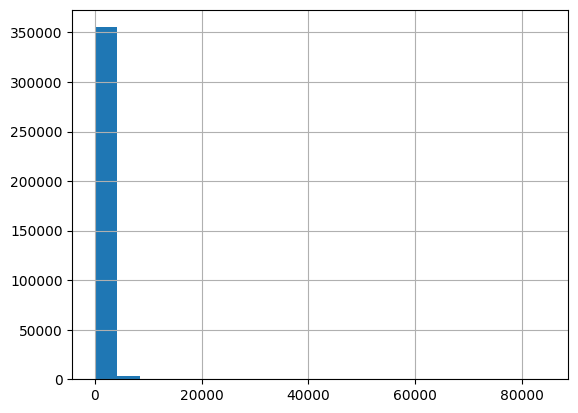

In [32]:
#se crea un histograma para visualizar la duración de sesiones en la plataforma
visits["session_duration_sec"].hist(bins=20) 

In [33]:
#se calcula la moda de la duración de las sesiones
print(visits["session_duration_sec"].mode())

0    60
dtype: int64


In [34]:
#calcular, ¿Con qué frecuencia los usuarios regresan?
visits["start_ts"]=pd.to_datetime(visits["start_ts"])

#crean columnas para sacar el mes, semana y día de las sesiones de los usuarios
visits["session_year"]=visits["start_ts"].dt.isocalendar().year
visits["session_month"]=visits["start_ts"].dt.month
visits["session_week"]=visits["start_ts"].dt.isocalendar().week
visits["session_day"]=visits["start_ts"].dt.date

#agrupa por cliente y tiempo a analizar
dau_total=visits.groupby("session_day").agg({"uid":"nunique"}).mean()
wau_total=visits.groupby(["session_year","session_week"]).agg({"uid":"nunique"}).mean()
mau_total=visits.groupby(["session_year","session_month"]).agg({"uid":"nunique"}).mean()

#calcula la adherencia a la marca
sticky_week=(dau_total / wau_total)
sticky_month=(dau_total / mau_total)

print("Adherencia a la semana:", sticky_week)
print("Adherencia al mes:", sticky_month)

Adherencia a la semana: uid    0.158844
dtype: float64
Adherencia al mes: uid    0.03909
dtype: float64


**Conclusiones:**


La empresa en promedio tiene 90 visitas al dia, 5718 a la semana y 2328 al mes. En general solo se abre sesión 1 vez al día por usuario con un 1.24 de sesiones registradas al día, lo que nos habla de que algunos usuarios regresan a la página pero no es un evento que se realice con regularidad.

Una sesión promedio en general dura 643 segundos, 6.4 minutos.
El tema esta en la adherencia del usuario, el cual es muy bajo (0.15), puede ser esto un factor normal al ser una empresa con ventas para eventos.

# Ventas

Para la ventas necesitamos entender como es el consumo de la gente en nuestra plataforma, entendiendo desde que punto inician la compras, entiendo en que punto de la interacción un usuario se convierte en cliente.
Tomaremos un periodo de  ____ para analizar las actividades de compra en la plataforma y calcular los tamaños promedio de compra de nuestros clientes, así logrando saber cuánto dinero ingresan por cliente en promedio en nuestro negocio.

In [35]:
#calcular, ¿Cuándo empieza la gente a comprar? 

#agrupar por id de usuario y día de orden, usa min para eligir la 1er orden
first_order_by_customer= orders.groupby("uid")["buy_ts"].min() 
#cambio del nombre del objeto serie
first_order_by_customer.name= "first_order_dates" 
#une a la tabla original la columna con la fecha de la 1er compra por usuario
orders=orders.join(first_order_by_customer, on="uid") 

#separar los meses de las columnas 
orders["first_order_month"]= orders["first_order_dates"].astype("datetime64[M]") 
orders["order_month"]= orders["buy_ts"].astype("datetime64[M]")

#buscar su primer visita a la pagina del data visits
first_visit_by_customer= visits.groupby("uid")["start_ts"].min()
first_visit_by_customer.name="first_visit_date"
orders=orders.join(first_visit_by_customer, on="uid")

#separar los meses de las columnas 
orders["first_visit_month"]= orders["first_visit_date"].astype("datetime64[M]") 

# restar de su primer compra contra su 1er sesion
orders["client_time"]=(orders["first_visit_month"]- orders["first_order_month"])


In [36]:
orders["client_time"].value_counts()

0 days       40613
-30 days      1867
-31 days      1689
-61 days      1000
-92 days       927
-153 days      494
-122 days      402
-62 days       338
-123 days      295
-28 days       265
-151 days      259
-120 days      237
-59 days       203
-212 days      197
-90 days       191
-181 days      164
-91 days       144
-184 days      138
-183 days      136
-273 days      111
-243 days       97
-214 days       93
-245 days       83
-215 days       79
-89 days        79
-304 days       69
-334 days       60
-121 days       54
-182 days       50
-242 days       45
-274 days       36
Name: client_time, dtype: int64

In [37]:
orders

,buy_ts,revenue,uid,first_order_dates,first_order_month,order_month,first_visit_date,first_visit_month,client_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01 00:09:00,2017-06-01,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:14:00,2017-06-01,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01 00:14:00,2017-06-01,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01 07:31:00,2017-06-01,0 days
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,2018-05-31 09:11:00,2018-05-01,0 days
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,2018-05-31 23:05:00,2018-05-01,0 days
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,2018-05-31 23:52:00,2018-05-01,0 days
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,2017-10-23 12:32:00,2017-10-01,-212 days


In [38]:
#calcular, ¿Cuántos pedidos se hacen durante un período de tiempo dado? (compras por mes)

#crear una nueva columna solo con el mes
orders['month'] = orders['buy_ts'].dt.month

In [39]:
#agrupa por mes y se cuentan la cantidad de ordenes mensuales
pedidos_mensuales=orders.groupby(["month"])["order_month"].count()

print(pedidos_mensuales)

month
1     4721
2     5281
3     5326
4     3273
5     4346
6     2355
7     2363
8     1807
9     3387
10    5679
11    5659
12    6218
Name: order_month, dtype: int64


In [40]:
print(pedidos_mensuales.mean())

4201.25


In [41]:
#calcular, ¿Cuál es el tamaño promedio de compra?
#agrupa por mes y se suma el ingreso
promedio_de_compra=orders.groupby(["month"]).agg({"revenue":"sum"})

promedio_de_compra

,revenue
month,
1,19417.13
2,25560.54
3,28834.59
4,16858.06
5,20735.98
6,9560.91
7,12539.47
8,8758.78
9,18345.51


In [42]:
print("Promedio anual:", promedio_de_compra.mean())
print("Mes mínimo:", promedio_de_compra.min())
print("Mes máximo:", promedio_de_compra.max())


Promedio anual: revenue    21004.766667
dtype: float64
Mes mínimo: revenue    8758.78
dtype: float64
Mes máximo: revenue    36388.6
dtype: float64


In [43]:
#calcular, ¿Cuánto dinero traen? (LTV)
orders["order_month"]= orders["buy_ts"].astype("datetime64[M]")
costs["month"]=costs["dt"].astype("datetime64[M]")

#agrupar el mes de la 1era compra de cada cliente
first_order=orders.groupby("uid").agg({"first_order_dates":"min"}).reset_index()
first_order.columns=["uid", "first_order_per_client"]

#calcula el numero de nuevos clientes por mes
cohort_sizes=first_order.groupby("first_order_per_client").agg({"uid":"nunique"}).reset_index()
cohort_sizes.columns=["first_order_per_client", "n_buyers"]
cohort_sizes["order_month"]=cohort_sizes["first_order_per_client"].astype("datetime64[M]")

#agregar el mes de la primer compra a la tabla de pedidos
orders1=pd.merge(orders, first_order, on="uid")
orders1["order_month"]=orders1["first_order_per_client"].astype("datetime64[M]")

#agrupar la tabla de pedidos por mes de la 1er compra y totalizar los ingresos
cohorts=orders1.groupby(["order_month"]).agg({"revenue":"sum"}).reset_index()

#agregar datos sobre cuantos usuarios realizaron sus primeras compras en cada mes 
report=pd.merge(cohort_sizes, cohorts, on="order_month")


In [44]:
#visualizar data report
report

,first_order_per_client,n_buyers,order_month,revenue
0,2017-06-01 00:10:00,1,2017-06-01,24031.69
1,2017-06-01 00:25:00,1,2017-06-01,24031.69
2,2017-06-01 00:27:00,1,2017-06-01,24031.69
3,2017-06-01 00:29:00,1,2017-06-01,24031.69
4,2017-06-01 07:58:00,1,2017-06-01,24031.69
...,...,...,...,...
34117,2018-05-31 23:43:00,1,2018-05-01,13925.76
34118,2018-05-31 23:50:00,2,2018-05-01,13925.76
34119,2018-05-31 23:54:00,1,2018-05-01,13925.76
34120,2018-05-31 23:56:00,1,2018-05-01,13925.76


In [45]:
final_report=report.groupby("order_month").agg({"revenue":"sum","n_buyers":"count"})

In [46]:
final_report

,revenue,n_buyers
order_month,,
2017-06-01,4.674164e+07,1945
2017-07-01,2.959473e+07,1835
2017-08-01,1.542472e+07,1329
2017-09-01,8.561583e+07,2469
2017-10-01,1.104966e+08,4003
2017-11-01,9.703604e+07,3718
2017-12-01,1.362200e+08,4068
2018-01-01,5.300542e+07,3181
2018-02-01,5.671719e+07,3386


In [47]:
#encontrar el beneficio bruto

#se pone un margen al hazar ya que no se nos fue proporcionado el dato
margin_rate=0.5
report["gp"]=report["revenue"]*margin_rate
report["age"]=(report["order_month"]-report["first_order_per_client"]) / np.timedelta64(1,"M") #pide time delta calcule el tiempo transcurrido
report["age"]=report["age"].astype("int") #redonde resultado a numeros enteros

#calcula ltv
report["ltv"]=report["gp"] / report["n_buyers"]

In [48]:
#crea una tabla dinamica
ltv=report.pivot_table( index="order_month", columns="age", values="ltv", aggfunc="mean").round ()
ltv.fillna(" ")

age,-1,0
order_month,,
2017-06-01,,11779.0
2017-07-01,7952.0,7875.0
2017-08-01,5667.0,5721.0
2017-09-01,,16945.0
2017-10-01,13367.0,13247.0
2017-11-01,,12490.0
2017-12-01,16174.0,16111.0
2018-01-01,8100.0,8085.0
2018-02-01,,8069.0


<AxesSubplot:xlabel='age', ylabel='order_month'>

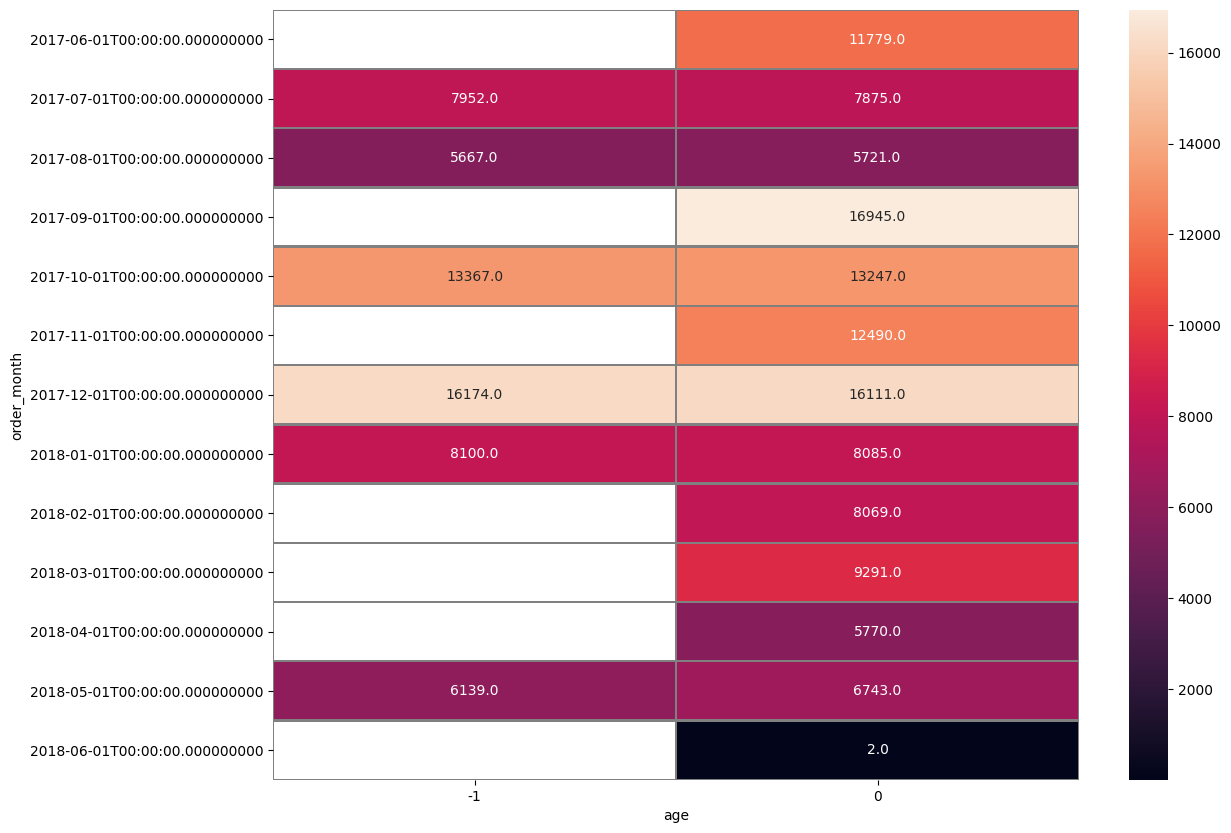

In [49]:
#crear un mapa de calor
plt.figure(figsize=(13,10))
plt.title=("LTV de lso clientes")

sns.heatmap(ltv, annot=True, fmt=".1f", linewidths="1", linecolor="gray")

In [50]:
#calcular ltv de nuestra primer cohorte
ltv_201707=ltv.loc["2017-06-01"].sum()
ltv_201707

11779.0

**Conclusiones:**

Genrealmente el mayor porcentaje de nuestros usuarios se vuelven clientes el mismo día, teniendo un rango de 0 hasta 794 (9 meses) para su compra.

En promedio recibimos 4 201 pedidos de eventos mensuales en nuestra empresa.

Un promedio de compra general es de 21 004.76, el evento que menos generó fue de 8 758.78 y el más caro fue de 36 388.6

Cada cliente nos genero un ltv de 11 779 de nuestra primera cohorte del mes junio del año 2017.

# Marketing

Para nuestra sección de marketing es importante analizar el costo beneficio de nuestras campañas, para poder tomar mejores decisiones a futuro y si la inversión realizada para esta área esta siendo el correcto o puede mejorarse según las métricas encontradas, si el beneficio por cliente es positivo a lo que nos cuesta adquirirlo y conocer que tan rentable esta siendo el negocio e inversiones actuales.

In [51]:
#calcula, ¿Cuánto dinero se gastó? (Total por fuente de adquisición a lo largo del tiempo)
costs["month"]=costs["dt"].dt.month
costos_por_fuente_mes=costs.groupby(["month", "source_id"]).agg({"costs":"sum"})
costos_por_fuente_mes

costs
month source_id          
1     1           2186.18
      2           4157.74
      3          14808.78
      4           5832.79
      5           5371.52
...                   ...
12    3          16219.52
      4           7680.47
      5           5872.52
      9            657.98
      10           645.86

[84 rows x 1 columns]

In [52]:
#agrupa por fuentes y se suman los costos
costos_por_fuente=costs.groupby(["source_id"]).agg({"costs":"sum"})
costos_por_fuente

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


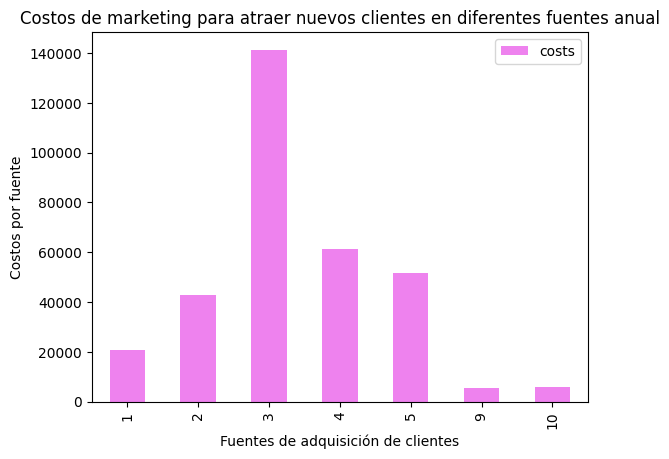

In [53]:
#graficar costos por fuente
costos_por_fuente.plot(y="costs", kind= "bar", xlabel= "Fuentes de adquisición de clientes",
                   ylabel="Costos por fuente",
                   title="Costos de marketing para atraer nuevos clientes en diferentes fuentes anual", 
                   color="violet")
plt.show()

In [55]:
device_visits=visits.groupby(["device", "session_day"]).agg({"source_id":"nunique"})
device_visits

source_id
device  session_day           
desktop 2017-06-01           7
        2017-06-02           7
        2017-06-03           7
        2017-06-04           7
        2017-06-05           7
...                        ...
touch   2018-05-27           7
        2018-05-28           7
        2018-05-29           7
        2018-05-30           6
        2018-05-31           7

[727 rows x 1 columns]

In [60]:
costos_agrupados=device_visits.groupby("device").agg({"source_id":"count"})
costos_agrupados

,source_id
device,
desktop,364
touch,363


In [64]:
#calcula, ¿Cuán rentables eran las inversiones? (ROMI)
#usar el data report como base, y agregar las columnas faltantes 

#calcular el CAC
#obtenemos la cohorte necesaria
cohort_201707= report[report["first_order_per_client"]== "2017-06-01"]
cost_201707=costs[costs["month"]==6]["costs"].sum()
n_buyers_201707= cohort_201707["n_buyers"]
cac_201707= cost_201707 / n_buyers_201707

cac_201707

Series([], Name: n_buyers, dtype: float64)

In [65]:
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,6
1,1,2017-06-02,62.25,6
2,1,2017-06-03,36.53,6
3,1,2017-06-04,55.00,6
4,1,2017-06-05,57.08,6
...,...,...,...,...
2537,10,2018-05-27,9.92,5
2538,10,2018-05-28,21.26,5
2539,10,2018-05-29,11.32,5
2540,10,2018-05-30,33.15,5


# Conclusiones

Basado en los resultados nuestra mayor fuente para marketing es la fuente 3, siendo un punto de ingreso importante
El negocio es rentable y aunue nuestro retorno no es grande 13%, podemos buscar mejorar en esa zona, a que nuestro negocio prospera siempre por clientes nuevos
Es evidente que en el momento de acceder a nuestra plataforma los clientes van decididos a comprar, pues en su mayoría se hacen las compras ese mismo día. Podemos enfocarnos en ventas sucesivas para mejorar.
Si más del 85% de nuestros clientes por el tipo d negocio que es son nuevos, podemos crear alguna membresía para propsperar el retorno de clientes además de darle peso al marketing para seguir atrayendo nuevos clientes, ya que sin ellos el negocio se vería afectado.